## Пункт 1. Реализовать СГС для решения ЛР. Исследовать сходимость с разным размером батча

In [179]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [180]:
# linear function, computes k-th coordinate by k-1 first
#   coefficients - k-1-dim array
#   x - k-1-dim array
def f(coefficients, x):
    return np.sum(coefficients * x)

class point_set:
    # n - amount of points
    # dim - space's dim
    # coords_bound - upper bound on absolute first k-1 coordinates value
    # coefficients_bound - upper bound on absolute coefficients value
    def __init__(self, n, dim, coords_bound, coefficients_bound):
        self.n = n
        self.dim = dim
        self.x = coords_bound * np.random.random_sample((n, dim - 1))
        coefficients = coefficients_bound * np.random.random_sample((dim - 1)) - coefficients_bound
        self.y = np.asarray([])
        for i in range(0, n):
            self.y = np.append(self.y, f(coefficients, self.x[i]))
        

input_2d = point_set(500, 2, 5., 2.)
input_3d = point_set(500, 3, 5., 2.)
input_small = point_set(100, 5, 5., 2.)
input_large = point_set(100, 20, 20., 5.)

In [181]:
# considered linear regression for points_set
# f = sum from i=0 to n-1 of (a*x_i + b - y_i)^2, where a.append(b) = c
#   points - point_set
#   c - k-dim array of coefficients points = [a_0, ..., a_k-2, b]
def linear_regression(points, c):
    f = 0
    for i in range(0, points.n):
        f += (np.sum(c[0 : points.dim - 1] * points.x[i]) + c[points.dim - 1] - points.y[i]) ** 2
    return f

In [182]:
# calculate gradient [d/da, d/db] of linear regression for points_set by variables x_i, where i in ids
#   points - point_set
#   ids - array of indices for taking gradient
#   coeffs - current linear regression = [a_0, ..., a_k-2, b]
def linear_regression_grad(points, ids, coeffs):
    a = coeffs[0 : points.dim - 1]
    b = coeffs[points.dim - 1]
    grad_a = np.asarray([0.] * len(a))
    grad_b = 0.
    for i in ids:
        grad_a += 2 * (np.sum(a * points.x[i]) + b - points.y[i]) * points.x[i]
        grad_b += 2 * (np.sum(a * points.x[i]) + b - points.y[i])
    return np.append(grad_a, grad_b)

In [183]:
# stochastic gradient descent
#   point - point_set
#   batch_size - amount of variables for diff in one epoch
#   gradinet_supplier - :)
#   starting_coeffs - array of point.dim len
#   lr - CONSTANT learning rate
#   eps - :)
#   epoches - max amount of epoches
# ret:
#   [
#       found coeffs - array of point.dim len,
#       history - array of all epoches changes
#   ]
def sgd(points, batch_size, gradinet_supplier, starting_coeffs, lr, eps, epoches):
    history = list()
    order = np.asarray(range(0, points.dim - 1))
    np.random.shuffle(order)

    batch_index = 0
    coeffs = starting_coeffs
    
    for i in range(0, epoches):
        to = min(batch_index + batch_size, points.dim)
        grad = gradinet_supplier(points, order[batch_index:to], coeffs)
        coeffs_step = coeffs - lr * grad
        
        if LA.norm(coeffs_step - coeffs) <= eps:
            break
        
        history.append(coeffs)
        coeffs = coeffs_step
        
        if to == points.dim:
            batch_index = 0
            np.random.shuffle(order)
        else:
            batch_index = to

    return [coeffs, history]

In [184]:
# call sgd with each possible batch_size for point_set
def batch_size_analyze(points):
    EPOCH_MAX = 1000
    epoches = np.asarray([])
    for batch in range(1, points.dim + 1):
        result = sgd(points, batch, linear_regression_grad, np.asarray([0.] * (points.dim)), 0.01, 1e-6, EPOCH_MAX)
        epoches = np.append(epoches, len(result[1]))

    plt.plot(np.linspace(1, len(epoches), len(epoches)), epoches)
    plt.xlabel("batch")
    plt.ylabel("epoches")
    plt.title("Mini-batch SGD for n=" + str(points.n) + ", dim=" + str(points.dim))
    plt.show()

In [185]:
# draw lin. reg. values by epoch for point_set & given batch
def print_linear_regression_epochs(points, batch):
    EPOCH_MAX = 1000
    result = sgd(points, batch, linear_regression_grad, np.asarray([0.] * (points.dim)), 0.01, 1e-6, EPOCH_MAX)

    lin_reg_values = np.asarray([])
    for coeffs in result[1]:
        lin_reg_values = np.append(lin_reg_values, [linear_regression(points, coeffs)])
        
    plt.plot(lin_reg_values)
    plt.xlabel("epoch")
    plt.ylabel("linear regression value")
    plt.title("linear regression SGD for n=" + str(points.n) + ", dim=" + str(points.dim))
    plt.show()

Собственно, сами запуски mini-batch SGD на различных наборах точек:

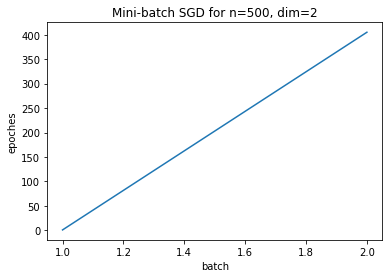

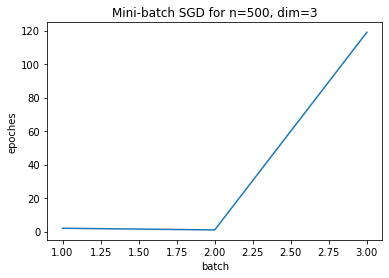

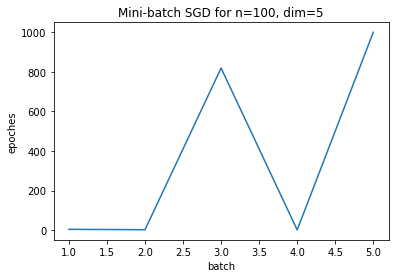

C:\Users\11\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\11\AppData\Local\Temp/ipykernel_6588/451794897.py:25: RuntimeWarning: invalid value encountered in subtract
  coeffs_step = coeffs - lr * grad
C:\Users\11\AppData\Local\Temp/ipykernel_6588/1910732609.py:11: RuntimeWarning: overflow encountered in multiply
  grad_a += 2 * (np.sum(a * points.x[i]) + b - points.y[i]) * points.x[i]
C:\Users\11\AppData\Local\Temp/ipykernel_6588/1910732609.py:11: RuntimeWarning: overflow encountered in add
  grad_a += 2 * (np.sum(a * points.x[i]) + b - points.y[i]) * points.x[i]
C:\Users\11\AppData\Local\Temp/ipykernel_6588/1910732609.py:12: RuntimeWarning: overflow encountered in double_scalars
  grad_b += 2 * (np.sum(a * points.x[i]) + b - points.y[i])
C:\Users\11\AppData\Local\Temp/ipykernel_6588/1910732609.py:11: RuntimeWarning: overflow encountered in double_scalars
  gra

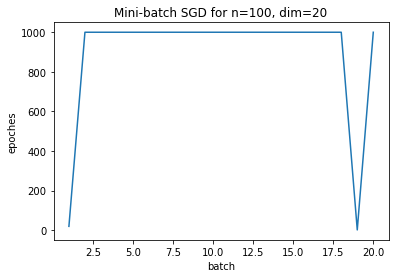

In [186]:
batch_size_analyze(input_2d)
batch_size_analyze(input_3d)
batch_size_analyze(input_small)
batch_size_analyze(input_large)

Микровывод: как можно видеть, mini-batch SGD для лин. регрессии без каких либо оптимизаций действительно сильно "скачет" в показаниях сходимости для ранзных величин batch и размерности пространства точек. В подавляющем большинстве случаев сойтись при эпсилон меньше 1 (наверняка еще и больше нужно брать) не получается даже за 1000 эпох :(

Но для batch < dim, сходимость достигается (если и достигается) за меньшее число эпох, по сравнению с ГС из лабораторной 1

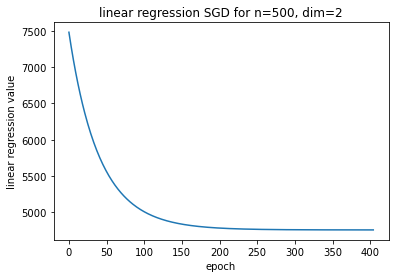

In [187]:
print_linear_regression_epochs(input_2d, 2)

Тем не менее в случаях, когда ГС (СГС) сходится, значения линейной регрессии действительно уменьшаются, а значит проблема расхождения - в поведении "несглаженного" вектора шага